In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable
import warnings
warnings.filterwarnings('ignore')
np.random.seed(0)

# Data Loading & Preprocessing:

    1. Loading the dataset and resizing it to 224 size image as Resnet-34 use this size input image, and then Transform into Tensors:

In [2]:
from torchvision import datasets, transforms
dataset_path=datasets.ImageFolder(root='/Users/tanya.banerjee/Downloads/FaceShape Dataset/training_set_2', transform=transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor()]))

    2. Spliting the dataset Into Train and Test:
    
        Spliting the Dataset into 80% training and 20% testing dataset, and shuffling the dataset to distribute the train 
        and test into random examples 
        

In [3]:
from torch.utils.data.sampler import SubsetRandomSampler

split = int(0.8 * len(dataset_path))
index_list = list(range(len(dataset_path)))
np.random.shuffle(index_list)
train_idx, test_idx = index_list[:split], index_list[split:] ## Traing and testing indexes.


## create sampler objects using SubsetRandomSampler
tr_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)
## create iterator objects for train and test datasets
train_loader = torch.utils.data.DataLoader(dataset_path, batch_size=32, sampler=tr_sampler)
test_loader = torch.utils.data.DataLoader(dataset_path, batch_size=32, sampler=test_sampler)

print ("Total Number of Examples: ",len(dataset_path))
print ("Number of training Examples: ",len(tr_sampler))
print ("Number of testing Examples: ",len(test_sampler))

Total Number of Examples:  3998
Number of training Examples:  3198
Number of testing Examples:  800


In [4]:
Classes_num=len(train_loader.dataset.classes)
print ('Number of Classes',Classes_num)
print('Classes Name: ', train_loader.dataset.classes)

Number of Classes 5
Classes Name:  ['Heart', 'Oblong', 'Oval', 'Round', 'Square']


Example: 


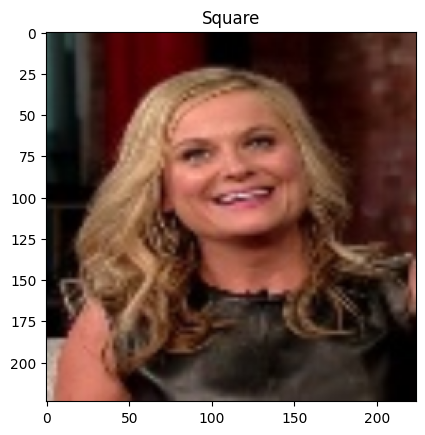

In [5]:
print ('Example: ')
i1, l1 = next(iter(train_loader))
plt.title(train_loader.dataset.classes[l1[0]])
plt.imshow(np.array(i1[0].permute(1, 2, 0)));

# Convolutional Neural Network (Resnet-34)

We will import already made Resnet34 models from torch vision library.

In [6]:
import torchvision.models as models
model = models.resnet34(num_classes=Classes_num)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Define the loss function and the optimizer using the nn and optim package:

In [7]:
import torch.optim as optim
import torch.nn as nn
# create a loss function
criterion = nn.CrossEntropyLoss()
# create a stochastic gradient descent optimizer
optimizer = optim.Adam(model.parameters(), lr=0.00001)

# Model Training

We are now ready to train the model. The core steps are Forward Propagation, Loss Computation, Backpropagation, and updating the parameters.

Note: Because of deep structure of resnet it takes quit more time for training and testing.


In [8]:
# run the main training loop
loss_array=[]
epochs=50
for epoch in range(1,epochs):
    
    for batch_idx, (data, target) in enumerate(train_loader):
        
        data, target = Variable(data), Variable(target)
        
        #In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch
        optimizer.zero_grad()## accumulates the gradients on subsequent backward passes.
        
        
        ## 1. forward propagation
        model_out = model(data)
        
        ## 2. loss calculation
        loss = criterion(model_out, target)
        
        ## 3. backward propagation
        loss.backward()
        
        ## 4. weight optimization
        optimizer.step()
        
        loss_array.append(loss.item())
        
        if batch_idx % len(train_loader)-1 == 0:
            
            print('Epoch: ',epoch,'Loss: ', loss.item())

Epoch:  1 Loss:  1.765787959098816
Epoch:  2 Loss:  1.470829963684082
Epoch:  3 Loss:  1.4171841144561768
Epoch:  4 Loss:  1.366834044456482
Epoch:  5 Loss:  1.2623075246810913
Epoch:  6 Loss:  1.232342004776001
Epoch:  7 Loss:  0.8584796786308289
Epoch:  8 Loss:  0.5951942205429077
Epoch:  9 Loss:  0.3304409086704254
Epoch:  10 Loss:  0.15320667624473572
Epoch:  11 Loss:  0.1054355725646019
Epoch:  12 Loss:  0.29635530710220337
Epoch:  13 Loss:  0.09324193745851517
Epoch:  14 Loss:  0.06866108626127243
Epoch:  15 Loss:  0.25224408507347107
Epoch:  16 Loss:  0.06097748875617981
Epoch:  17 Loss:  0.036565959453582764
Epoch:  18 Loss:  0.03353246673941612
Epoch:  19 Loss:  0.02477623149752617
Epoch:  20 Loss:  0.06351865082979202
Epoch:  21 Loss:  0.03944963216781616
Epoch:  22 Loss:  0.032165396958589554
Epoch:  23 Loss:  0.01752507872879505
Epoch:  24 Loss:  0.04571552202105522
Epoch:  25 Loss:  0.029044656082987785
Epoch:  26 Loss:  0.004721348639577627
Epoch:  27 Loss:  0.02266933768

KeyboardInterrupt: 

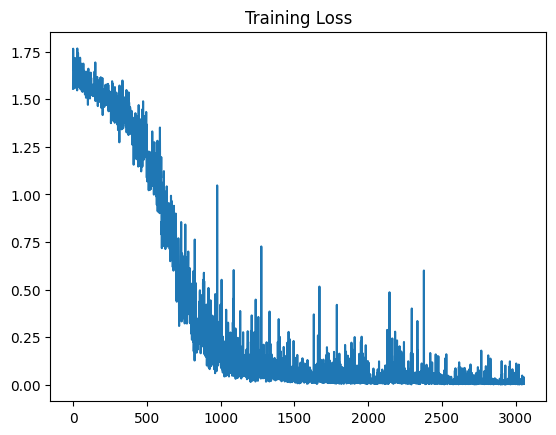

In [9]:
plt.plot(loss_array)
plt.title("Training Loss")
plt.show()

# Model Testing

Once the model is trained, Lets test it on test dataset.

In [10]:
# run a test loop
test_loss = 0
correct = 0
for data, target in test_loader:
    data, target = Variable(data), Variable(target)
    
    model_out = model(data)
    # sum up batch loss
    
    test_loss += criterion(model_out, target).item()
    pred = model_out.data.max(1)[1]  # get the index of the max log-probability
    correct += pred.eq(target.data).sum()

test_loss /= len(test_loader.dataset)

print('Average loss: ',test_loss)
print('Accuracy: ',np.array(100. * correct / len(test_sampler)),'%')
print ('Total Test Examples: ',len(test_sampler))
print ('Correct predicted Examples: ',int(correct))


Average loss:  0.01887272858154541
Accuracy:  30.75 %
Total Test Examples:  800
Correct predicted Examples:  246
